In [ ]:
%matplotlib inline


# Data set of Gramian angular fields

A Gramian angular field is an image obtained from a time series, representing
some kind of temporal correlation between each pair of values from the time
series. Two methods are available: Gramian angular summation field and Gramian
angular difference field.
It is implemented as :class:`pyts.image.GramianAngularField`.

In this example, we consider the training samples of the
[GunPoint dataset](http://timeseriesclassification.com/description.php?Dataset=GunPoint),
consisting of 50 univariate time series of length 150.
The Gramian angular summation field of each time series is independently
computed and the 50 Gramian angular summation fields are plotted.


In [4]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import os
import numpy as np
# Load the GunPoint dataset
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
#combine the train and test data
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(50, 150)
(150, 150)
(50,)
(150,)
(200, 150)
(200,)


In [ ]:

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)

# Plot the 200 Gramian angular fields
fig = plt.figure(figsize=(20, 10))

# Create a folder for the images
if not os.path.exists('GAF_images'):
    os.makedirs('GAF_images')

grid = ImageGrid(fig, 111, nrows_ncols=(10, 20), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    if i < 200:
        im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
        # Save the images in the corresponding class folder
        if not os.path.exists('GAF_images/'+str(y[i])):
            os.makedirs('GAF_images/'+str(y[i]))
        plt.imsave("GAF_images/"+str(y[i])+"/GAF_"+str(i)+".png",X_gaf[i],cmap='rainbow',origin='lower',vmin=-1.,vmax=1.)
    else:
        ax.axis('off')  # Turn off the axis for the remaining subplots
   
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 200 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()




In [1]:
# get the data from GAF_images folder which has two folders for 2 classes
import os
import cv2
import numpy as np


#resize all the images to 32x32 and put them in a list
data = []
labels = []
for folder in os.listdir('GAF_images'):
    for file in os.listdir('GAF_images/' + folder):
        img = cv2.imread('GAF_images/' + folder + '/' + file)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(int(folder) - 1)

print(len(data))
print(len(labels))

    
#convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape)
print(labels.shape)
print(len(labels))


200
200
(200, 32, 32, 3)
(200,)
200


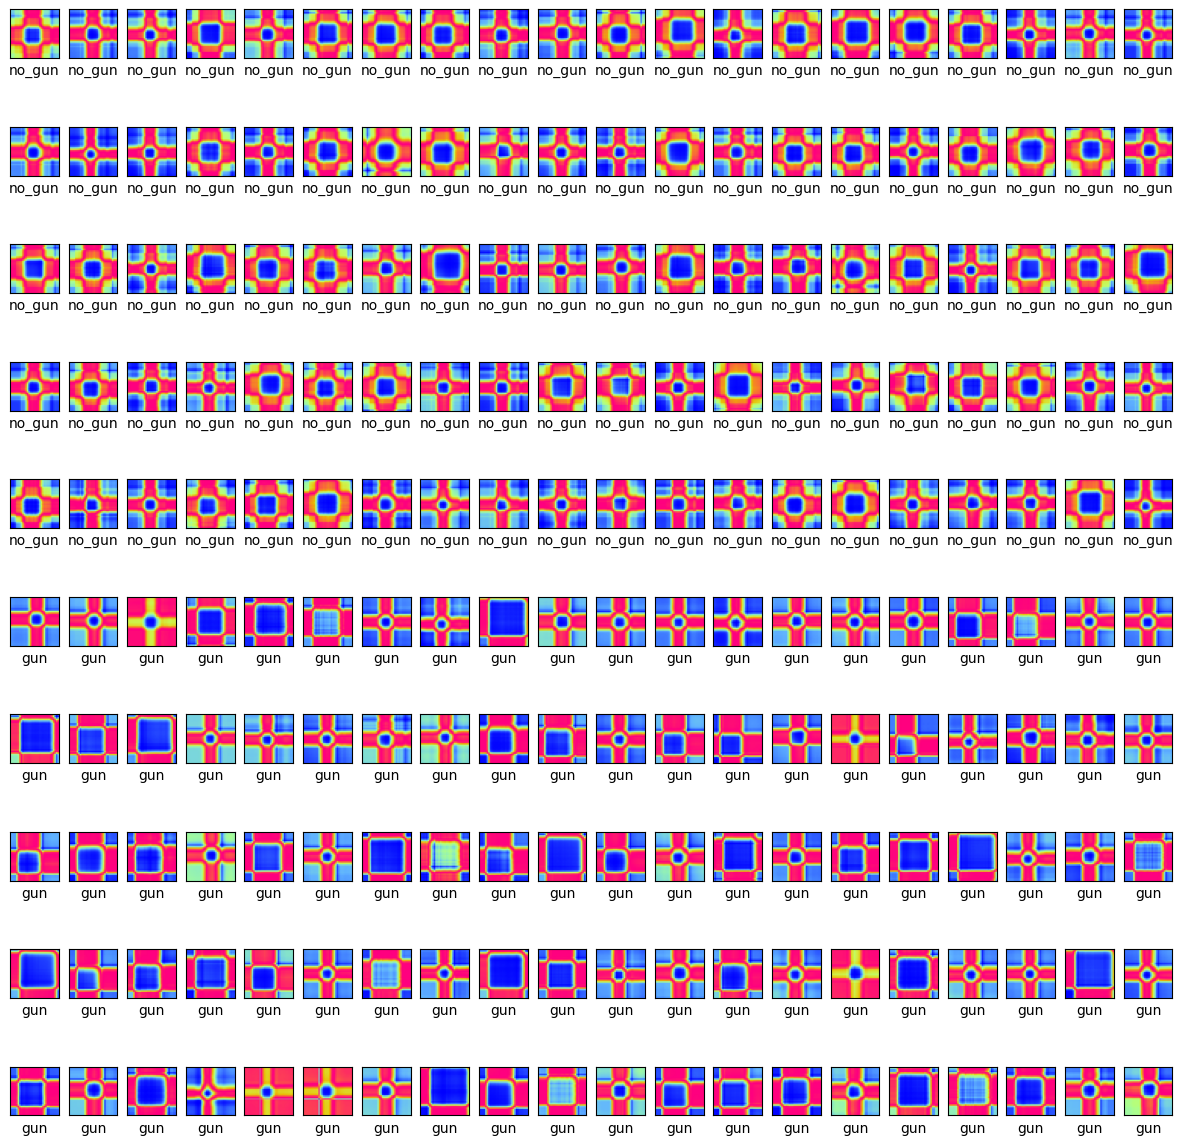

In [5]:
# CIFAR-10 classes
class_names = ['gun', 'no_gun']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Visualize all 200 images
for i in range(200):
    plt.subplot(10, 20, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i] - 1])

plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your features and 'labels' contains your target labels

# Create a test dataset with 20% of each class
test_size = 0.2  # 20% for the test dataset
random_state = 42  # for reproducibility

# Determine the number of samples for each class in the test set
unique_labels = np.unique(labels)
num_samples_per_class = int(len(labels) * test_size / len(unique_labels))

X_test = []
y_test = []

# Iterate over each unique label (class)
for label in unique_labels:
    # Find indices corresponding to the current class
    class_indices = np.where(labels == label)[0]
    # Randomly select 20% of samples for the test set
    test_indices = np.random.choice(class_indices, size=num_samples_per_class, replace=False)
    # Append selected samples and labels to the test dataset
    X_test.extend(data[test_indices])
    y_test.extend(labels[test_indices])

# Convert test data and labels to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Remove selected samples from the original data and labels
data = np.delete(data, test_indices, axis=0)
labels = np.delete(labels, test_indices)

# Now, split the remaining data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=random_state)

# Print shapes of train, validation, and test sets
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)
print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)
print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)
X_valid = (X_valid - mean) / (std + 1e-7)


Train Images Shape:       (144, 32, 32, 3)
Train Labels Shape:       (144,)

Validation Images Shape:  (36, 32, 32, 3)
Validation Labels Shape:  (36,)

Test Images Shape:        (40, 32, 32, 3)
Test Labels Shape:        (40,)


In [7]:
from keras.utils import to_categorical
num_classes = len(np.unique(labels))
print(num_classes)
y_train = to_categorical(y_train.reshape(-1, 1), num_classes)
y_valid = to_categorical(y_valid.reshape(-1, 1), num_classes)
y_test  = to_categorical(y_test.reshape(-1, 1), num_classes)
print(y_train.shape)

2
(144, 2)


In [8]:
# Data augmentation
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # Randomly flip images horizontally
    horizontal_flip=True,
    
    # Zoom images in by up to 10%
    zoom_range=0.1,
    
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    
    # Channel shift intensity
    channel_shift_range=0.1,
)

In [9]:
from keras import models, layers

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,050 (476.76 KB)

 Trainable params: 122,050 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Set the batch size for the training
batch_size = 1

# Set the maximum number of epochs for the training
epochs = 10

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          verbose=2)

Epoch 1/10


144/144 - 2s - 15ms/step - accuracy: 0.9722 - loss: 0.0584 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 2/10
144/144 - 1s - 4ms/step - accuracy: 0.9583 - loss: 0.1186 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 3/10
144/144 - 1s - 5ms/step - accuracy: 0.9583 - loss: 0.0700 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/10
144/144 - 1s - 4ms/step - accuracy: 0.9722 - loss: 0.0625 - val_accuracy: 0.8611 - val_loss: 0.2552
Epoch 5/10
144/144 - 1s - 4ms/step - accuracy: 0.9653 - loss: 0.0862 - val_accuracy: 1.0000 - val_loss: 4.8165e-04
Epoch 6/10
144/144 - 1s - 4ms/step - accuracy: 0.9792 - loss: 0.0868 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 7/10
144/144 - 1s - 4ms/step - accuracy: 0.9861 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 8/10
144/144 - 1s - 4ms/step - accuracy: 0.9861 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 9/10
144/144 - 1s - 4ms/step - accuracy: 0.9444 - loss: 0.2610 - val_accuracy: 1.0000 - val_loss: 0.0626
Epoch 1

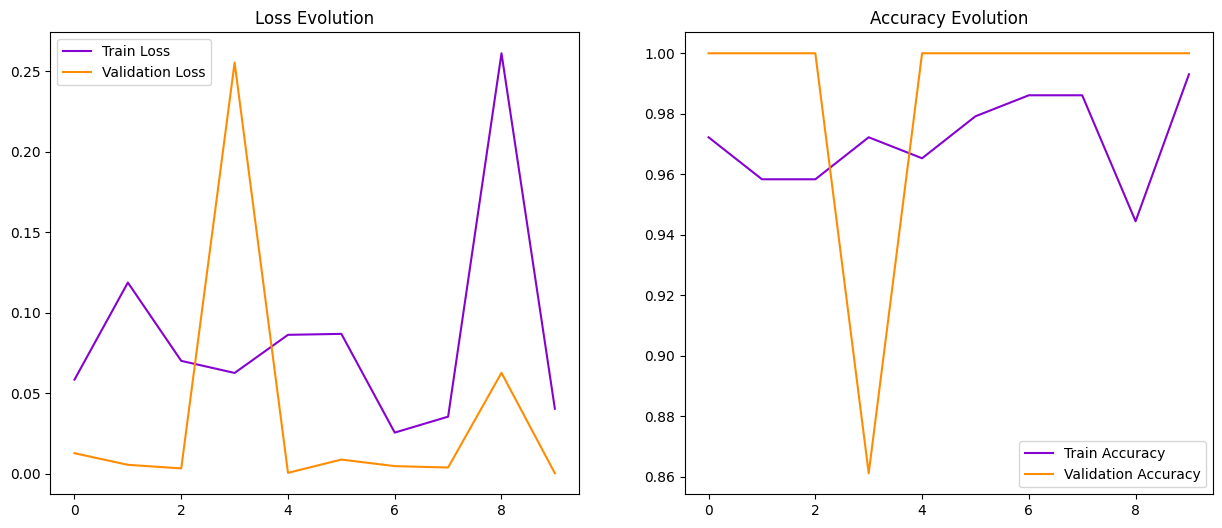

In [26]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.1504
Test accuracy: 0.949999988079071


In [12]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

blocks = [0, 2]
outputs = [model.layers[i].output for i in blocks]
model.layers


0 conv2d (None, 30, 30, 32)
2 conv2d_1 (None, 13, 13, 64)
4 conv2d_2 (None, 4, 4, 64)


[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


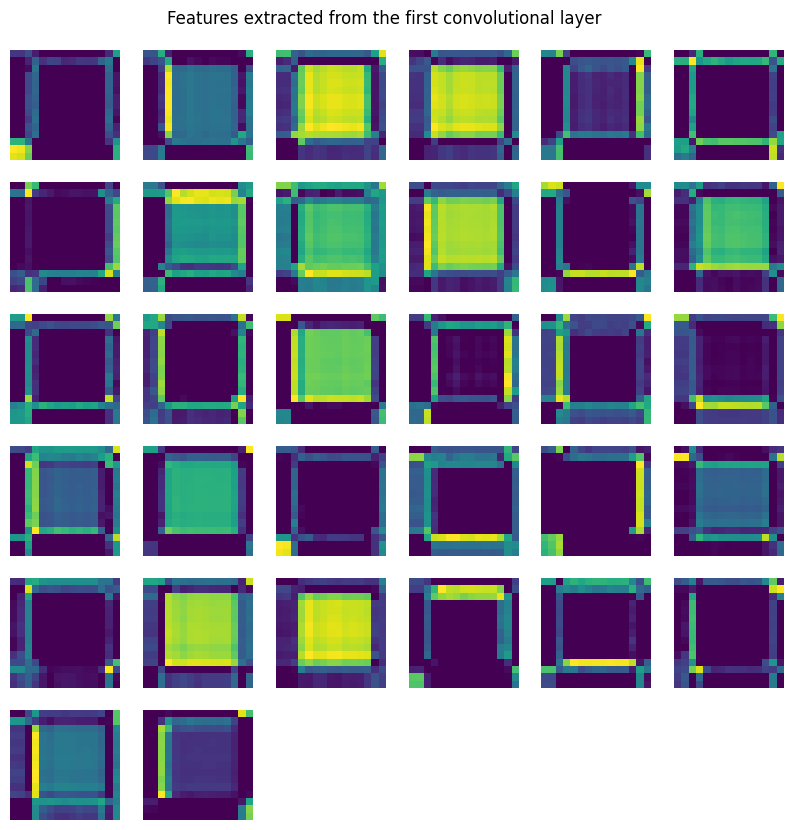

In [20]:
from tensorflow.keras.models import Model
model_layer_1 = Model(inputs=model.inputs , outputs=model.layers[1].output)

sample_image = X_train[0]

features = model_layer_1.predict(sample_image.reshape(1,32,32,3))

fig = plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(6, 6, i + 1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Features extracted from the first convolutional layer', y=0.92)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


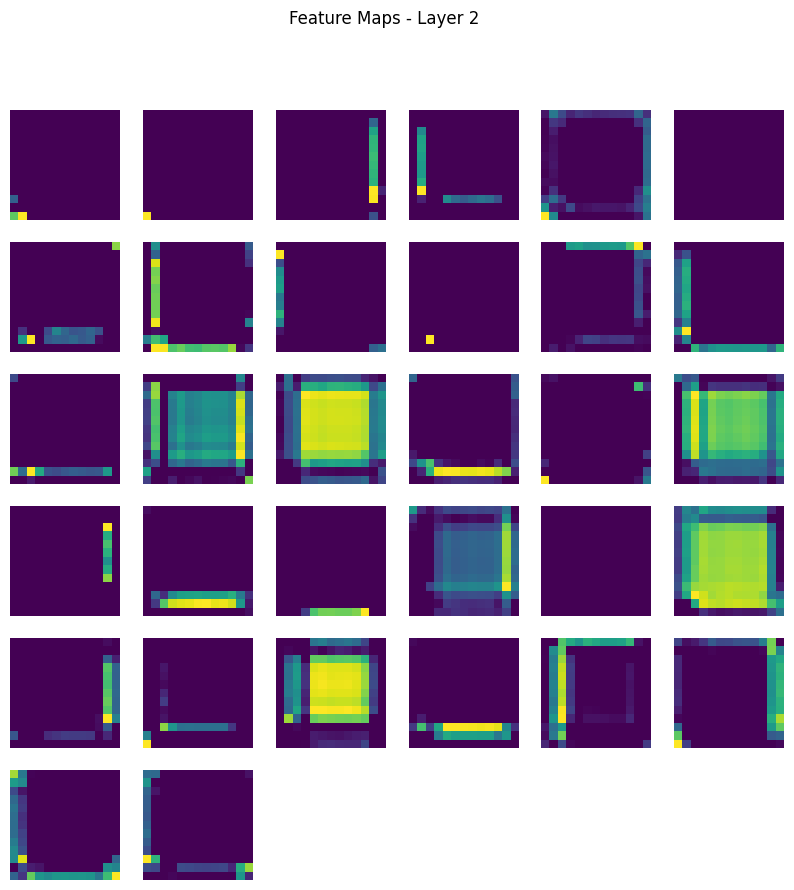

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


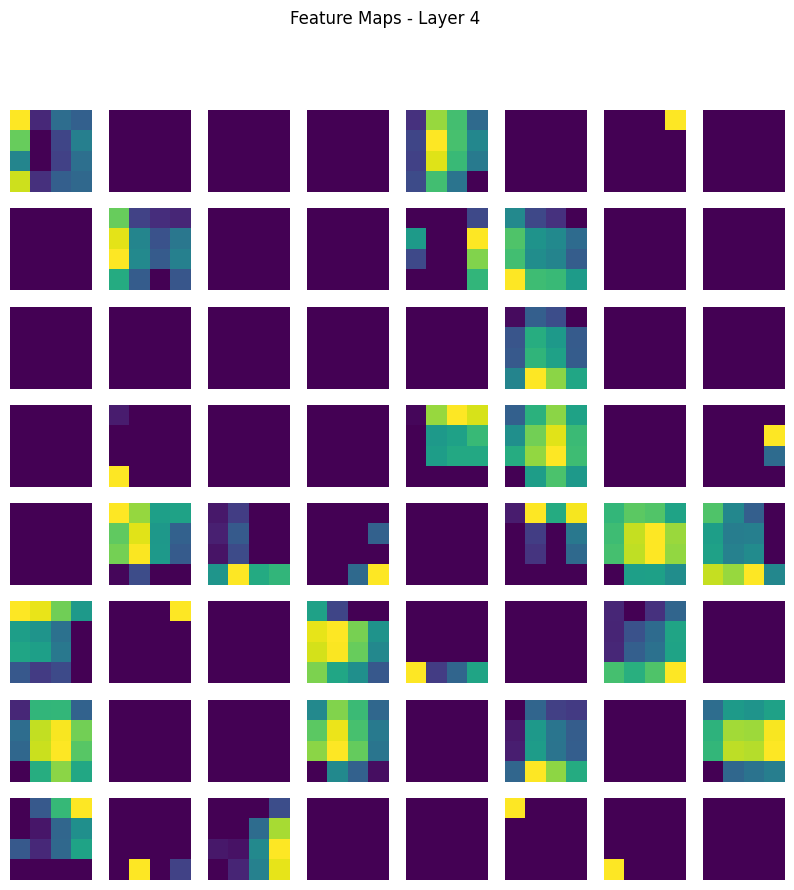

In [21]:
# Define new models for specific layers
model_layer_2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
model_layer_4 = Model(inputs=model.inputs, outputs=model.layers[4].output)

# Sample image from the training set
sample_image = X_train[0]

# Visualize feature maps for layer 2
features_layer_2 = model_layer_2.predict(sample_image.reshape(1, 32, 32, 3))

fig = plt.figure(figsize=(10, 10))
for i in range(32):
    plt.subplot(6, 6, i + 1)
    plt.imshow(features_layer_2[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps - Layer 2')
plt.show()

# Visualize feature maps for layer 4
features_layer_4 = model_layer_4.predict(sample_image.reshape(1, 32, 32, 3))

fig = plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(features_layer_4[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Feature Maps - Layer 4')
plt.show()


In [33]:
# Define the CNN architecture
filter_size = 5

model_new = models.Sequential([
    layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (filter_size, filter_size), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (filter_size, filter_size), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model_new.summary()

# Set the batch size for the training
batch_size = 2

# Set the maximum number of epochs for the training
epochs = 10

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model_new.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_new.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid, y_valid),
          verbose=2)

Epoch 1/10
72/72 - 4s - 59ms/step - accuracy: 0.5417 - loss: 0.6987 - val_accuracy: 0.6667 - val_loss: 0.5342
Epoch 2/10
72/72 - 2s - 34ms/step - accuracy: 0.7500 - loss: 0.5320 - val_accuracy: 0.9167 - val_loss: 0.1224
Epoch 3/10
72/72 - 2s - 33ms/step - accuracy: 0.9028 - loss: 0.3729 - val_accuracy: 0.9444 - val_loss: 0.0776
Epoch 4/10
72/72 - 2s - 33ms/step - accuracy: 0.9097 - loss: 0.2699 - val_accuracy: 0.9444 - val_loss: 0.1890
Epoch 5/10
72/72 - 2s - 32ms/step - accuracy: 0.9097 - loss: 0.3325 - val_accuracy: 0.9722 - val_loss: 0.1957
Epoch 6/10
72/72 - 2s - 31ms/step - accuracy: 0.9097 - loss: 0.2426 - val_accuracy: 0.9444 - val_loss: 0.0864
Epoch 7/10
72/72 - 2s - 33ms/step - accuracy: 0.9444 - loss: 0.1544 - val_accuracy: 0.9444 - val_loss: 0.0749
Epoch 8/10
72/72 - 2s - 32ms/step - accuracy: 0.9514 - loss: 0.1723 - val_accuracy: 0.9722 - val_loss: 0.0562
Epoch 9/10
72/72 - 2s - 32ms/step - accuracy: 0.9375 - loss: 0.2403 - val_accuracy: 0.8889 - val_loss: 0.1347
Epoch 10/1

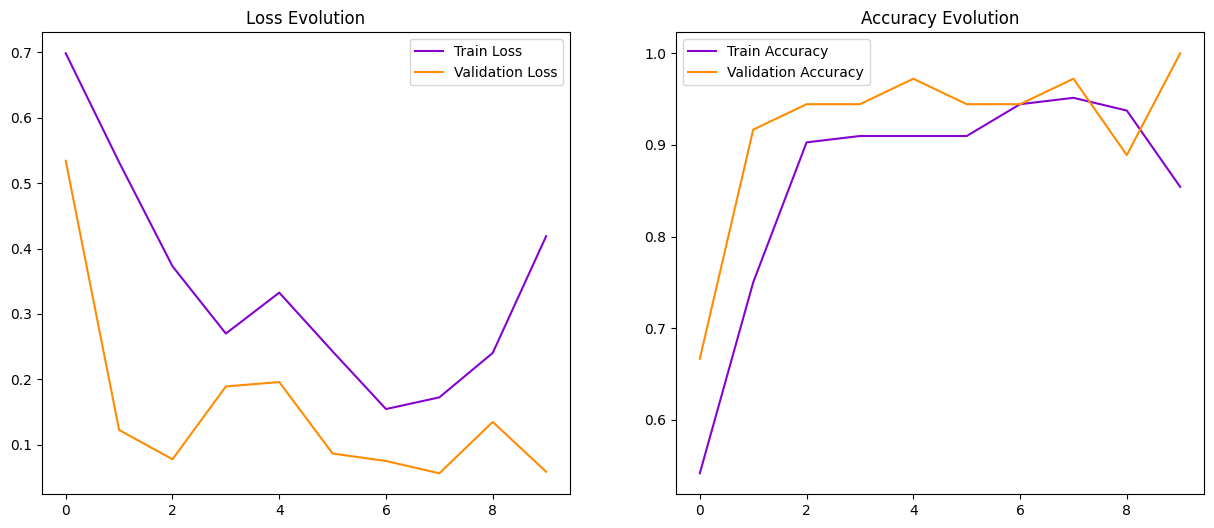

In [34]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model_new.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model_new.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model_new.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model_new.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [35]:
# Evaluate the model on the test set
test_loss, test_acc = model_new.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9021 - loss: 0.2618
Test accuracy: 0.8999999761581421
